In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-lience/car licence.jpg


In [20]:
!pip install easyocr

In [21]:
!pip install imutils

In [22]:
## libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr 

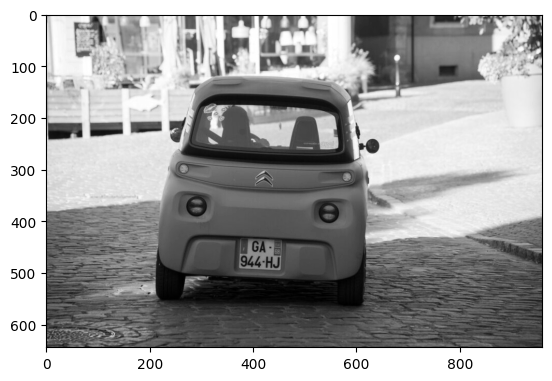

In [23]:
## read image
image = cv2.imread("/kaggle/input/car-lience/car licence.jpg")
img = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
plt.imshow(gray , cmap = "gray")

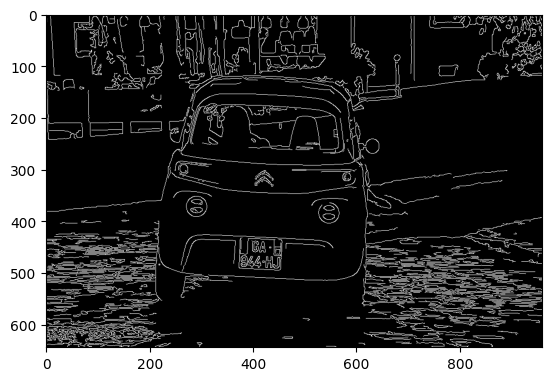

In [24]:
## apply filter and edges
filter = cv2.bilateralFilter(gray , 11 , 17 , 17)
edges = cv2.Canny(filter , 50 , 150 )
plt.imshow(edges , cmap = "gray")

In [25]:
## apply contours
contour = cv2.findContours(gray , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(contour)
contours = sorted(contourss , key = cv2.contourArea , reverse = True)[:10]
len(contours)

10

In [26]:
## find location for lience
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour , 10 , True)
    if len(approx) == 4:
        location = approx
        break
len(location)
        

4

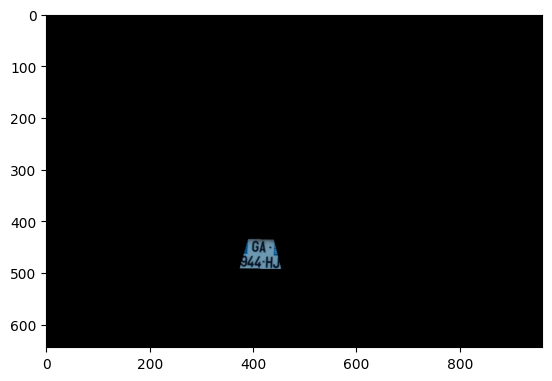

In [31]:
mask = np.zeros(gray.shape , np.uint8)
new_image = cv2.drawContours(mask , [location] , -1 , 255 , -1)
new_image = cv2.bitwise_and(img , img , mask = mask)
plt.imshow(new_image)

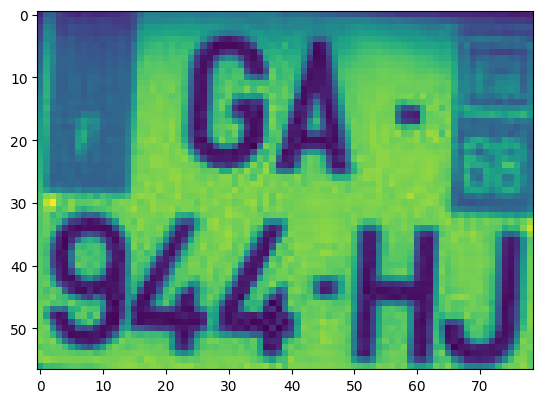

In [30]:
## cropped image
(x , y) = np.where(mask == 255)
(x1 , y1) = (np.min(x) , np.min(y))
(x2 , y2) = (np.max(x) , np.max(y))
cropped_image = gray[x1:x2 , y1:y2]
plt.imshow(cropped_image)

In [33]:
## read text
reader = easyocr.Reader(["en"])
result = reader.readtext(cropped_image)
result

[([[20, 0], [56, 0], [56, 32], [20, 32]], 'GA', 0.9253430872657221),
 ([[0, 28], [79, 28], [79, 57], [0, 57]], '944HJ', 0.7408536987360346)]

# By: Jana Ashraf